# Пример MCMC с использованием pymc3

Импорт

In [10]:
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

sns.set_style('white')
sns.set_context('talk')

import pymc3 as pm

Для тестирования уберем случайность

In [11]:
np.random.seed(123)

Данные

In [12]:
data = np.random.randn(20)

Визуализация данных

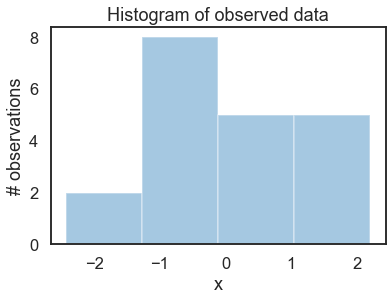

In [13]:
ax = plt.subplot()
sns.distplot(data, kde=False, ax=ax)
_ = ax.set(title='Histogram of observed data', xlabel='x', ylabel='# observations');

Модель

In [14]:
with pm.Model():
    mu = pm.Normal('mu', 0, 1)
    sigma = 1.
    returns = pm.Normal('returns', mu=mu, sd=sigma, observed=data)
    
    step = pm.Metropolis()
    trace = pm.sample(15000, step, chains=4)

Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [mu]
Sampling 4 chains: 100%|████████████████████████████████████████████████████| 62000/62000 [00:21<00:00, 2822.51draws/s]
The number of effective samples is smaller than 25% for some parameters.


Визуализация модели

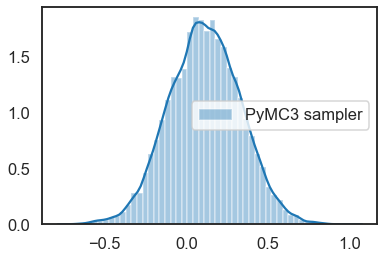

In [15]:
# Model visualisation
sns.distplot(trace[2000:]['mu'], label='PyMC3 sampler')
plt.legend()

Автокорреляция

No handles with labels found to put in legend.


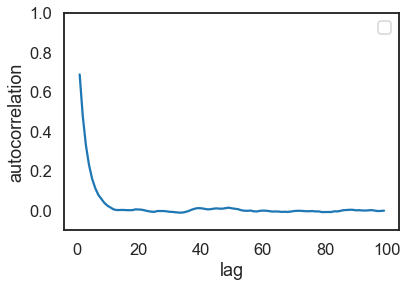

In [16]:
from pymc3.stats import autocorr
lags = np.arange(1, 100)
fig, ax = plt.subplots()
ax.plot(lags, [autocorr(trace['mu'], l) for l in lags])
ax.legend(loc=0)
_ = ax.set(xlabel='lag', ylabel='autocorrelation', ylim=(-.1, 1))

## Источники

### Теория
[MCMC руками, Хабр](https://habr.com/ru/company/wunderfund/blog/279545/)

[Более понятная реализация руками, Хабр](https://habr.com/ru/company/piter/blog/491268/)

### Работа с pymc3
[Документация](https://docs.pymc.io/notebooks/api_quickstart.html)